In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/DNA/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/DNA/dataset/chimpanzee.txt
/content/drive/MyDrive/DNA/dataset/example_dna.fa
/content/drive/MyDrive/DNA/dataset/human.txt
/content/drive/MyDrive/DNA/dataset/dog.txt


In [ ]:
human_data = pd.read_table('/content/drive/MyDrive/DNA/dataset/human.txt')
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [ ]:
chimp_data = pd.read_table('/content/drive/MyDrive/DNA/dataset/chimpanzee.txt')
chimp_data.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [ ]:
dog_data = pd.read_table('/content/drive/MyDrive/DNA/dataset/dog.txt')
dog_data.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [ ]:
dna_sequences = human_data['words'][0]
nucleotide_colors = {"A": "red", "C": "blue", "G": "green", "T": "yellow"}


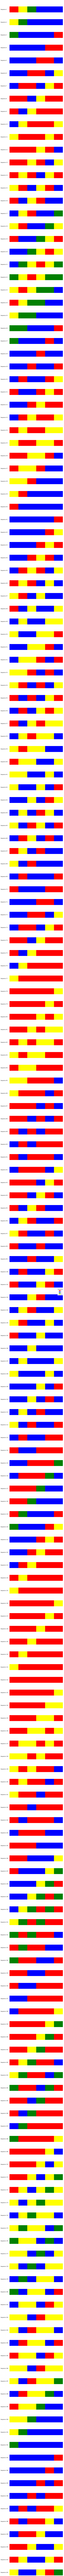

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Function to convert sequence to colors, with adjustment for lowercase input
def sequence_to_colors(sequence, nucleotide_colors):
    # Convert each nucleotide to uppercase before getting its color
    return [nucleotide_colors[nucleotide.upper()] for nucleotide in sequence]


# Plotting
fig, axs = plt.subplots(len(dna_sequences), figsize=(10, len(dna_sequences) * 2), tight_layout=True)

# Create a patch (proxy artist) for each nucleotide for the legend
legend_patches = [patches.Patch(color=color, label=nucleotide) for nucleotide, color in nucleotide_colors.items()]

for i, sequence in enumerate(dna_sequences):
    ax = axs[i] if len(dna_sequences) > 1 else axs
    ax.axis('off')
    ax.set_xlim(0, len(sequence))
    ax.set_ylim(0, 2)  # Adjusted to provide space for labels

    # Optionally, add a label for each sequence
    ax.text(-1, 0.5, f"Sequence {i+1}", verticalalignment='center', fontsize=12)

    for j, nucleotide in enumerate(sequence.upper()):
        rect = patches.Rectangle((j, 0), 1, 1, linewidth=1, edgecolor='none', facecolor=nucleotide_colors[nucleotide])
        ax.add_patch(rect)

# Add the legend outside the right of the axes
fig.legend(handles=legend_patches, loc='upper right', bbox_to_anchor=(1, 0.5), title="Nucleotides")

plt.show()


In [ ]:
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [ ]:
human_data['words'] = human_data.apply(lambda x: getKmers(x['sequence']), axis=1)
human_data = human_data.drop('sequence', axis=1)
chimp_data['words'] = chimp_data.apply(lambda x: getKmers(x['sequence']), axis=1)
chimp_data = chimp_data.drop('sequence', axis=1)
dog_data['words'] = dog_data.apply(lambda x: getKmers(x['sequence']), axis=1)
dog_data = dog_data.drop('sequence', axis=1)

In [ ]:
human_texts = list(human_data['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_data = human_data.iloc[:, 0].values

In [ ]:
chimp_texts = list(chimp_data['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_chimp = chimp_data.iloc[:, 0].values
dog_texts = list(dog_data['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_dog = dog_data.iloc[:, 0].values

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

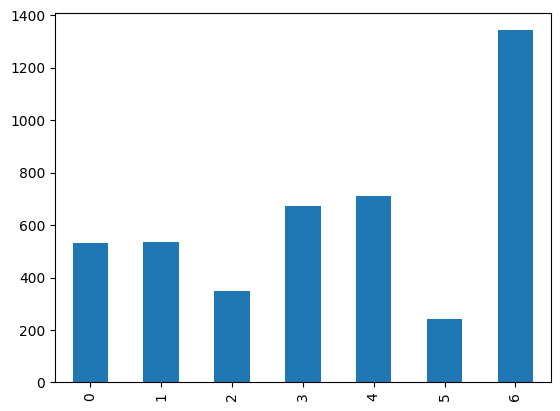

In [ ]:
human_data['class'].value_counts().sort_index().plot.bar();

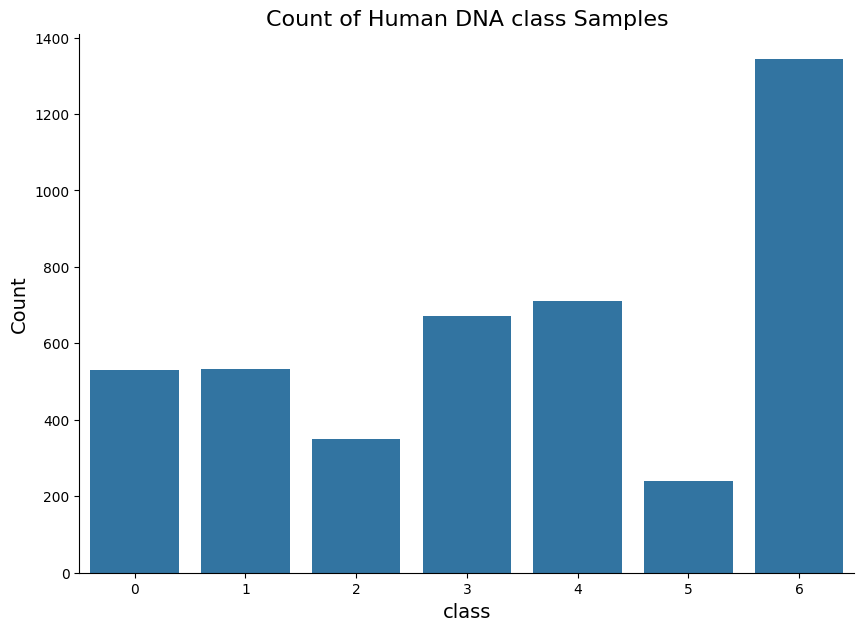

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 7))
plt.title('Count of Human DNA class Samples', size=16)
sns.countplot(x='class', data=human_data)
plt.ylabel('Count', size=14)
plt.xlabel('class', size=14)
sns.despine(top=True, right=True, left=False, bottom=False)
#plt.savefig('/content/drive/MyDrive/CSI_7_MAL_2324_CW_resit/results/CountofCategoriesgraph.png')
plt.show()

In [ ]:
X

<4380x232414 sparse matrix of type '<class 'numpy.int64'>'
	with 5406441 stored elements in Compressed Sparse Row format>

In [ ]:
y_data

array([4, 4, 3, ..., 6, 6, 6])

# DCGAN

(4380, 232414)
(4380,)
Starting Training Loop...
[0/5][0/137]	Loss_D: 1.4003	Loss_G: 20.5718	D(x): 0.5115	D(G(z)): 0.5179 / 0.0000
[0/5][50/137]	Loss_D: 100.5583	Loss_G: 0.0000	D(x): 0.5788	D(G(z)): 1.0000 / 1.0000
[0/5][100/137]	Loss_D: 0.5016	Loss_G: 34.9254	D(x): 0.6268	D(G(z)): 0.0001 / 0.0000
[1/5][0/137]	Loss_D: 0.6997	Loss_G: 6.1018	D(x): 0.5684	D(G(z)): 0.1049 / 0.0047
[1/5][50/137]	Loss_D: 0.7381	Loss_G: 6.3818	D(x): 0.5397	D(G(z)): 0.0929 / 0.0025
[1/5][100/137]	Loss_D: 0.8887	Loss_G: 5.5798	D(x): 0.4676	D(G(z)): 0.0748 / 0.0051
[2/5][0/137]	Loss_D: 0.8430	Loss_G: 5.7548	D(x): 0.5201	D(G(z)): 0.0707 / 0.0040
[2/5][50/137]	Loss_D: 0.9135	Loss_G: 6.1118	D(x): 0.4781	D(G(z)): 0.1270 / 0.0031
[2/5][100/137]	Loss_D: 0.7997	Loss_G: 6.0292	D(x): 0.5206	D(G(z)): 0.0877 / 0.0033
[3/5][0/137]	Loss_D: 0.7897	Loss_G: 5.6876	D(x): 0.5168	D(G(z)): 0.0509 / 0.0048
[3/5][50/137]	Loss_D: 0.6989	Loss_G: 6.5331	D(x): 0.5756	D(G(z)): 0.1020 / 0.0026
[3/5][100/137]	Loss_D: 0.5854	Loss_G: 5.9202	D

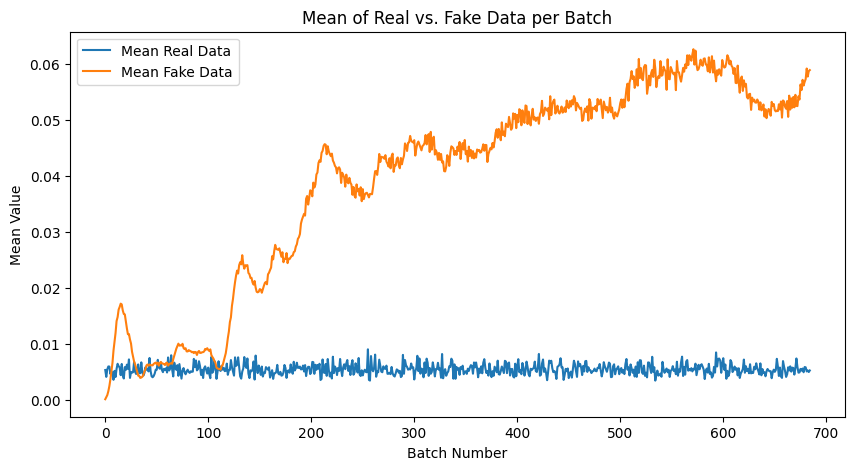

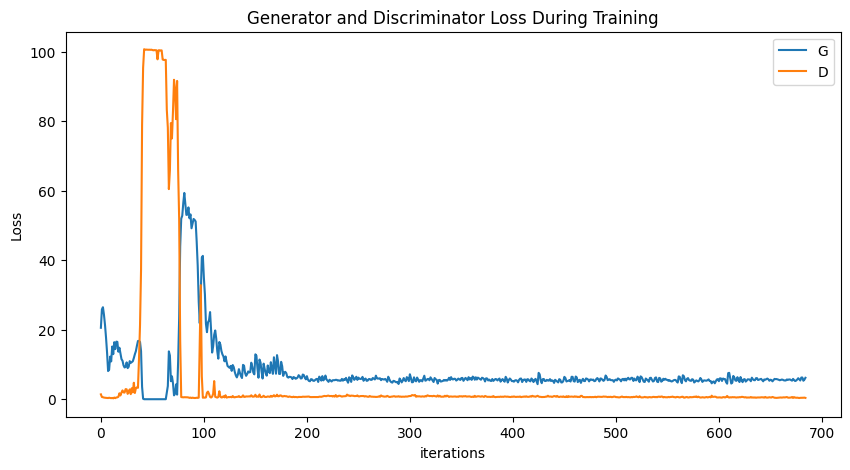

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

# Assuming your data is loaded into X_data and y_data
# For this example, let's create dummy data
# Normally, you would load your actual dataset here
X_data = X  # Simulated feature data
y_data = y_data # Simulated labels, assuming 7 classes
X_data_tensor = torch.FloatTensor(X_data.todense())  # If X_data is a scipy sparse matrix
y_data_tensor = torch.tensor(y_data).long()  # Ensure y_data is the correct type

# Create a DataLoader for your dataset
batch_size = 32
dataset = TensorDataset(X_data_tensor, y_data_tensor)
print(X_data.shape)
print(y_data.shape)

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define the Generator and Discriminator
class Generator(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_size),
            nn.Tanh(),
        )

    def forward(self, x):
        return self.net(x)

class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_dim):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.net(x)

# Initialize models
input_size = 100  # Size of latent vector (arbitrarily chosen)
output_size = 232414  # Size of the data vector
hidden_dim = 256  # Hidden dimension size
netG = Generator(input_size, hidden_dim, output_size).to(device)
netD = Discriminator(output_size, hidden_dim).to(device)

# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize the progression of the generator
fixed_noise = torch.randn(64, input_size, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

means_real = []
means_fake = []

# Training Loop
num_epochs = 5
G_losses = []
D_losses = []

print("Starting Training Loop...")
for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        output = netD(real_cpu).view(-1)
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        noise = torch.randn(b_size, input_size, device=device)
        fake = netG(noise)
        means_real.append(real_cpu.mean().item())
        means_fake.append(fake.mean().item())
        label.fill_(fake_label)
        output = netD(fake.detach()).view(-1)
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        output = netD(fake).view(-1)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

# After training, plot the captured means
plt.figure(figsize=(10, 5))
plt.plot(means_real, label='Mean Real Data')
plt.plot(means_fake, label='Mean Fake Data')
plt.xlabel('Batch Number')
plt.ylabel('Mean Value')
plt.title('Mean of Real vs. Fake Data per Batch')
plt.legend()
plt.show()

# Plotting the training history
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Model Performance

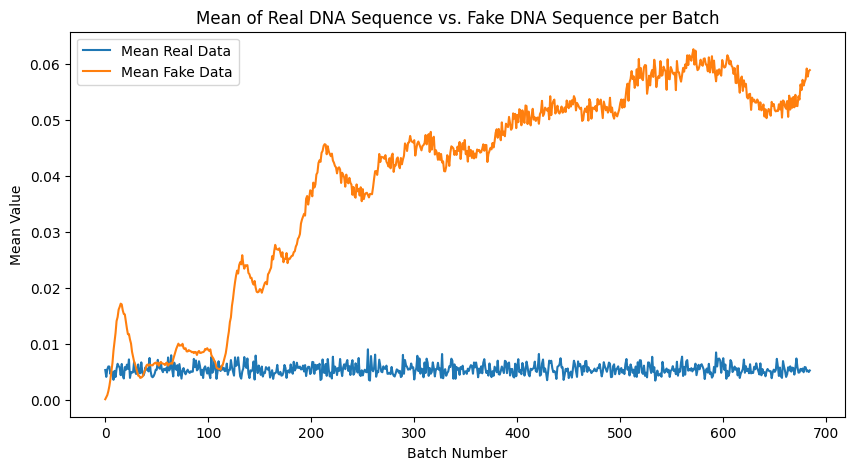

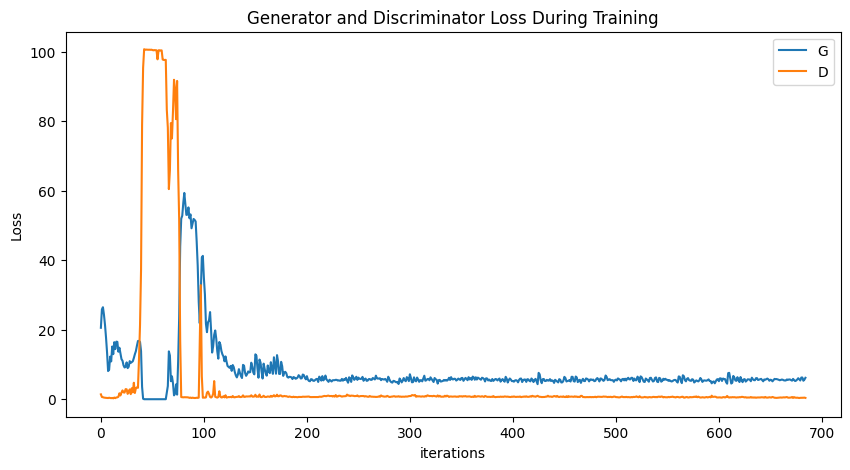

In [ ]:
# After training, plot the captured means
plt.figure(figsize=(10, 5))
plt.plot(means_real, label='Mean Real Data')
plt.plot(means_fake, label='Mean Fake Data')
plt.xlabel('Batch Number')
plt.ylabel('Mean Value')
plt.title('Mean of Real DNA Sequence vs. Fake DNA Sequence per Batch')
plt.legend()
plt.show()

# Plotting the training history
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Save DCGAN Models

In [ ]:
# Save models
torch.save(netG.state_dict(), '/content/drive/MyDrive/DNA/models/generator_model.pth')
torch.save(netD.state_dict(), '/content/drive/MyDrive/DNA/models/discriminator_model.pth')

# Test DCGAN

In [ ]:
# Initialize models
netG = Generator(input_size, hidden_dim, output_size).to(device)
netD = Discriminator(output_size, hidden_dim).to(device)

# Load models
netG.load_state_dict(torch.load('/content/drive/MyDrive/DNA/models/generator_model.pth'))
netD.load_state_dict(torch.load('/content/drive/MyDrive/DNA/models/discriminator_model.pth'))

# Set models to evaluation mode
netG.eval()
netD.eval()

Discriminator(
  (net): Sequential(
    (0): Linear(in_features=232414, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=1, bias=True)
    (3): Sigmoid()
  )
)

# Inference

In [ ]:
# Generate batch of latent vectors
noise = torch.randn(batch_size, input_size, device=device)
# Generate fake data
with torch.no_grad(): # We don't need to track gradients for inference
    fake_data = netG(noise)
    # Your generated data is now stored in fake_data


# Testing and Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size = 0.20, random_state=42)

In [ ]:
# Assuming X_test is a PyTorch tensor of your real test data
real_mean = X_test.mean().item()
fake_mean = fake_data.mean().item()

print(f"Mean of real test data: {real_mean}")
print(f"Mean of generated data: {fake_mean}")


Mean of real test data: 0.005436380199040873
Mean of generated data: 0.05799727514386177


# MultinomialNB Classification

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [ ]:
y_pred = classifier.predict(X_test)

# Model Performance Evoluation

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import r2_score
from scipy import stats
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.utils import to_categorical
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

def mlresults(modelname ,v, Y_test,pred,X_test):
  scores = cross_val_score(v, X_test, Y_test, cv=10)
  le = preprocessing.LabelEncoder()
  target=le.fit_transform(Y_test)
  predicted = le.fit_transform(pred)
  accuracy = metrics.accuracy_score(target, predicted)
  confusion_matrix = metrics.confusion_matrix(target, predicted)
  print('============================== {} Model Test Results =============================='.format(modelname))
  print()
  # Plot ROC curve
  plt.figure(figsize=(15,15))
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = np.unique(Y_test))
  cm_display.plot()
  plt.title('Confusion Matrix of '+modelname, fontsize = 16)
  plt.tight_layout()
  plt.savefig('/content/drive/MyDrive/CSI_7_MAL_2324_CW_resit/results/'+modelname+'confusionmatrixgraph.png')
  plt.show()
  classification = metrics.classification_report(target, predicted)
  accuracy = metrics.accuracy_score(target, predicted)
  mse=mean_squared_error(target, predicted)
  mae = metrics.mean_absolute_error(target, predicted)
  rs=r2_score(target, predicted)
  print("Cross Validation Mean Score:" "\n", scores.mean())
  print()
  print("Model Accuracy:" "\n", accuracy)
  print()
  print("Mean squared error: ", mse)
  print()
  print('Variance score: %.2f' % rs)
  print()
  print("Confusion matrix:" "\n", confusion_matrix)
  print()
  print("Classification report:" "\n", classification)

  return scores.mean(),accuracy,mse,mae,rs

============================== Basic Bagging Model Test Results ==============================



<Figure size 1500x1500 with 0 Axes>

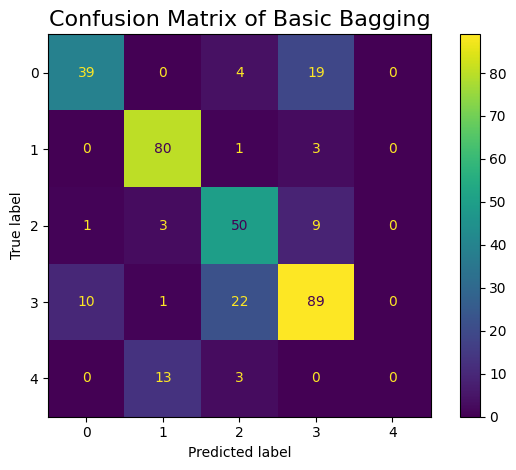

Cross Validation Mean Score:
 0.6447058823529411

Model Accuracy:
 0.7435158501440923

Mean squared error:  1.3285302593659942

Variance score: 0.10

Confusion matrix:
 [[39  0  4 19  0]
 [ 0 80  1  3  0]
 [ 1  3 50  9  0]
 [10  1 22 89  0]
 [ 0 13  3  0  0]]

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.63      0.70        62
           1       0.82      0.95      0.88        84
           2       0.62      0.79      0.70        63
           3       0.74      0.73      0.74       122
           4       0.00      0.00      0.00        16

    accuracy                           0.74       347
   macro avg       0.59      0.62      0.60       347
weighted avg       0.71      0.74      0.72       347



In [ ]:
from sklearn import metrics

models = []
models.append(('Basic Bagging', Basicbagging))
accuracy_score=list()
mse_values=list()
variance_score=list()
modelnames= list()
resultscore=pd.DataFrame(columns=['Model','Cross Validation Score','Accuracy','Mean Square Error','Mean Absolute Error','Root2 Score'])
j=0
for i, v in models:
    scores,accuracy,mse,mae,rs=mlresults(i,v, Y_test,v.predict(X_test),X_test)
    accuracy_score.append(accuracy)
    mse_values.append(mse)
    variance_score.append(rs)
    resultscore.loc[j] =[i,scores,accuracy,mse,mae,rs]
    j=j+1
    modelnames.append(i)

In [ ]:
resultscore

,Model,Cross Validation Score,Accuracy,Mean Square Error,Mean Absolute Error,Root2 Score
0,Basic Bagging,0.644706,0.743516,1.32853,0.533141,0.095363


In [ ]:
resultscore.to_csv('/content/drive/MyDrive/CSI_7_MAL_2324_CW_resit/results/Resulttable.csv')
resultscore

,Model,Cross Validation Score,Accuracy,Mean Square Error,Mean Absolute Error,Root2 Score
0,Basic Bagging,0.644706,0.743516,1.32853,0.533141,0.095363


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984
